In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

 **Информация о датасете**

Датасет содержит информацию об ожидаемой продолжительности жизни и факторах здоровья населения 193-х стран за 2000-2015 годы. Набор данных содержит около 22 признаков, которые можно разделить на категории: факторы, связанные с иммунизацией, факторы смертности, экономические факторы и социальные факторы.

# **Загрузка и чтение данных**

In [2]:
url = "https://raw.githubusercontent.com/lutovatanya/machine-learning-course/025d68b79d4fba538d9a04861f199ed40c13a180/Life_Expectancy_Data.csv"
data_raw = pd.read_csv(url, sep=',', engine='python')
data_raw.shape

(2938, 22)

In [3]:
data_raw.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Воспользуемся результатами первой лабораторной работы и проделаем аналогичные операции с данными

In [4]:
data_raw.rename(columns={'Life expectancy ': 'Life expectancy', 'Measles ': 'Measles' , ' BMI ': 'BMI', 'under-five deaths ': 'Under-five deaths', 'Diphtheria ': 'Diphtheria', ' HIV/AIDS': 'HIV/AIDS', ' thinness  1-19 years': 'Thinness 1-19 years', ' thinness 5-9 years': 'Thinness 5-9 years' }, inplace=True)
data_raw.columns
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

**Обработка категориальных признаков**

In [5]:
data_raw['Country'] = data_raw['Country'].astype('category')
data_raw['Status'] = data_raw['Status'].astype('category')

**Обработка пропущенных значений**

In [6]:
data_raw.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Заполним пропущенные значения медианой

In [7]:
data_raw["Population"].fillna(data_raw["Population"].median(axis = 0), axis=0 , inplace=True)
data_raw["Hepatitis B"].fillna(data_raw["Hepatitis B"].median(axis = 0), axis=0 , inplace=True)
data_raw["GDP"].fillna(data_raw["GDP"].median(axis = 0), axis=0 , inplace=True)
data_raw["Total expenditure"].fillna(data_raw["Total expenditure"].median(axis = 0), axis=0 , inplace=True)
data_raw["Alcohol"].fillna(data_raw["Alcohol"].median(axis = 0), axis=0 , inplace=True)
data_raw["Income composition of resources"].fillna(data_raw["Income composition of resources"].median(axis = 0), axis=0 , inplace=True)
data_raw["Schooling"].fillna(data_raw["Schooling"].median(axis = 0), axis=0 , inplace=True)
data_raw.isna().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
BMI                                34
Under-five deaths                   0
Polio                              19
Total expenditure                   0
Diphtheria                         19
HIV/AIDS                            0
GDP                                 0
Population                          0
Thinness 1-19 years                34
Thinness 5-9 years                 34
Income composition of resources     0
Schooling                           0
dtype: int64

Остальные признаки имеют слишком малое кол-во пропущенных значений, поэтому можем просто удалить строчки с недостающими значениями

In [8]:
data_raw.dropna(axis=0, how='all', subset=['Life expectancy'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Adult Mortality'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['BMI'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Polio'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Diphtheria'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Thinness 1-19 years'], inplace=True)
data_raw.dropna(axis=0, how='all', subset=['Thinness 5-9 years'], inplace=True)
print(data_raw.shape)
data_raw.isna().sum()

(2888, 22)


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

**Оработка категориальных значений**

In [9]:
data_raw = pd.get_dummies(data_raw)
print(data_raw.shape)
data_raw.head()

(2888, 215)


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),...,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


**Нормализация**

In [10]:
data_norm = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_norm.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),...,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,0.0,2888.000000,2888.000000,0.0,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,0.0,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.501016,0.627123,0.224872,0.016842,0.256437,0.038474,0.836915,0.011511,0.485915,0.016794,0.829918,0.322035,0.829254,0.032669,0.056222,0.007947,0.172123,0.167766,0.669837,0.585821,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,...,0.005540,0.005540,0.005540,0.005540,NaN,0.005540,0.005540,NaN,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.004848,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,NaN,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.005540,0.177285,0.822715
std,0.307129,0.180179,0.171771,0.066051,0.220295,0.102828,0.234541,0.054488,0.260609,0.064697,0.243059,0.138725,0.243803,0.101318,0.112384,0.042095,0.160196,0.158260,0.211680,0.150127,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,...,0.074239,0.074239,0.074239,0.074239,NaN,0.074239,0.074239,NaN,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.069468,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,NaN,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.074239,0.381976,0.381976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [11]:
data_norm["Country_South Sudan"].fillna(data_raw["Country_South Sudan"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Sudan"].fillna(data_raw["Country_Sudan"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Tuvalu"].fillna(data_raw["Country_Tuvalu"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Cook Islands"].fillna(data_raw["Country_Cook Islands"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Dominica"].fillna(data_raw["Country_Dominica"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Marshall Islands"].fillna(data_raw["Country_Marshall Islands"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Monaco"].fillna(data_raw["Country_Monaco"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Nauru"].fillna(data_raw["Country_Nauru"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Niue"].fillna(data_raw["Country_Niue"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Palau"].fillna(data_raw["Country_Palau"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_Saint Kitts and Nevis"].fillna(data_raw["Country_Saint Kitts and Nevis"].median(axis = 0), axis=0 , inplace=True)
data_norm["Country_San Marino"].fillna(data_raw["Country_San Marino"].median(axis = 0), axis=0 , inplace=True)
data_norm.isna().sum()

Year                 0
Life expectancy      0
Adult Mortality      0
infant deaths        0
Alcohol              0
                    ..
Country_Yemen        0
Country_Zambia       0
Country_Zimbabwe     0
Status_Developed     0
Status_Developing    0
Length: 215, dtype: int64

# **Обучающая и тестовая выборки**

Разобьем наши данные на обучающую и тестовую выборки, которые составляют 75% и 25% соответсвенно

In [12]:
X = data_norm.drop(['Schooling'], axis=1)
y = data_raw['Schooling']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
N_test, _ = X_test.shape

**Обучение классификатора**

В качестве алгоритма оптимизации выберем алгоритм Adam, в качестве функции активации - Relu, а в качетве метрики оценки классификатора возьмем accuracy_score.

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [14]:
model = MLPClassifier(
    hidden_layer_sizes=(50,),
    solver='adam',
    activation='relu',
    random_state=3,
    max_iter=1000
)

In [15]:
%%time
model.fit(X_train, y_train.astype('int64'))


CPU times: user 37.5 s, sys: 23.8 s, total: 1min 1s
Wall time: 31.5 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=3)

Проверим качество классификатора и точность на обучающей и тестовой выборках

In [16]:
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [29]:
print("Train: {:.2f}% Test: {:.2f}%".format(accuracy_score(y_train.astype('int64'), y_train_prediction)
      * 100, accuracy_score(y_test.astype('int64'), y_test_prediction) * 100))

Train: 87.86% Test: 70.36%


Из последнего вывода можно наблюдать переобучение, так как точность на тренировочной выборке сильно больше, чем на тестовой

**Подбор гиперпараметров**

Подберем оптимальное значение параметра alpha

In [19]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train.astype('int64'))

    y_train_prediction = mlp_model.predict(X_train)
    y_test_prediction = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train.astype('int64') != y_train_prediction))
    test_err.append(np.mean(y_test.astype('int64') != y_test_prediction))
    train_acc.append(sklearn.metrics.accuracy_score(y_train.astype('int64'), y_train_prediction))
    test_acc.append(sklearn.metrics.accuracy_score(y_test.astype('int64'), y_test_prediction))

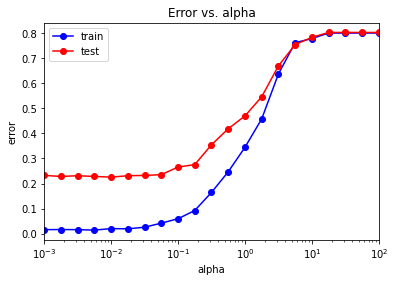

In [20]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

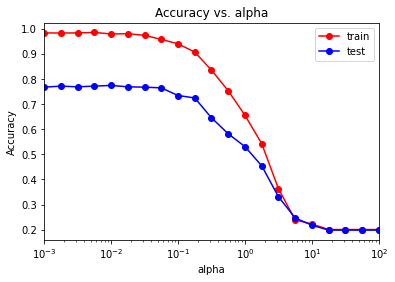

In [21]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Из графика выше видим, что при значениях alpha < 1 наблюдается переобучение. Начиная с alpha_opt точность и на тествой и на обучающей выборке совпадает, то есть получаем оптимальное значения для параметра alpha. При дальнейшем увеличении alpha точность уменьшается, а значит наблюдаем недообучение.

Выявим минимальное значение ошибки

In [22]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.014773776546629732 0.2257617728531856


Оптимальное значение альфа

In [24]:
alpha_optarr = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_optarr[0]
print(alpha_opt)

0.01


Классификатор с учетом оптимального значения альфа:

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(80,),
                          solver='adam', activation='relu', random_state=7)
mlp_model.fit(X_train, y_train.astype('int64'))

y_train_prediction = mlp_model.predict(X_train)
y_test_prediction = mlp_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [27]:
print("Train: {:.2f}% Test: {:.2f}%".format(accuracy_score(y_train.astype('int64'), y_train_prediction)
      * 100, accuracy_score(y_test.astype('int64'), y_test_prediction) * 100))

Train: 87.86% Test: 70.36%


Точность на обучающей и тестовой выборке стала несколько лучше, но все равно разница существенна

Метрика качества

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test.astype('int64'), y_test_prediction))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           2       1.00      1.00      1.00         1
           3       0.67      0.50      0.57         8
           4       0.14      0.17      0.15         6
           5       0.64      0.53      0.58        17
           6       0.54      0.44      0.48        16
           7       0.52      0.48      0.50        23
           8       0.66      0.85      0.74        39
           9       0.72      0.70      0.71        44
          10       0.77      0.74      0.76        69
          11       0.77      0.64      0.70        75
          12       0.78      0.88      0.83       143
          13       0.69      0.66      0.68        76
          14       0.68      0.62      0.65        68
          15       0.70      0.72      0.71        68
          16       0.69      0.77      0.73        35
          17       0.50      0.47      0.48        17
          18       0.54    

**Подбор количества нейронов**

In [30]:
neuron_count_array = np.linspace(10, 300, 30).astype(int)
test_error = []
train_error = []
test_acc = []
train_acc = []

for neuron_count in neuron_count_array:
    model = MLPClassifier(
        alpha=alpha_opt,
        hidden_layer_sizes=(neuron_count,),
        solver='adam',
        activation='relu',
        max_iter=1000,
        random_state=7
    )
    model.fit(X_train, y_train.astype('int64'))

    y_train_prediction = model.predict(X_train)
    y_test_prediction = model.predict(X_test)

    test_error.append(np.mean(y_test.astype('int64') != y_test_prediction))
    train_error.append(np.mean(y_train.astype('int64') != y_train_prediction))
    test_acc.append(accuracy_score(y_test.astype('int64'), y_test_prediction))
    train_acc.append(accuracy_score(y_train.astype('int64'), y_train_prediction))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


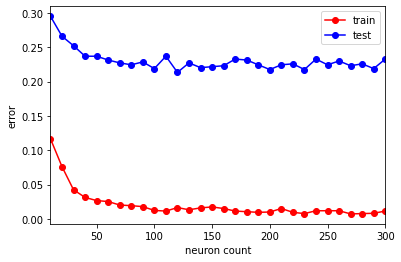

In [31]:
plt.plot(neuron_count_array, train_error, 'r-o', label='train')
plt.plot(neuron_count_array, test_error, 'b-o', label='test')
plt.xlim([np.min(neuron_count_array), np.max(neuron_count_array)])
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()

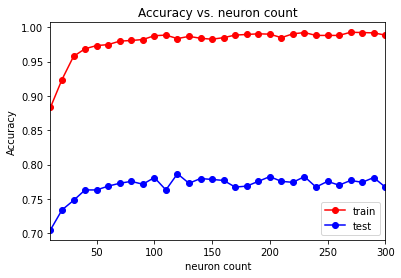

In [32]:
plt.plot(neuron_count_array, train_acc, 'r-o', label='train')
plt.plot(neuron_count_array, test_acc, 'b-o', label='test')
plt.xlim([np.min(neuron_count_array), np.max(neuron_count_array)])
plt.title('Accuracy vs. neuron count')
plt.xlabel('neuron count')
plt.ylabel('Accuracy')
plt.legend()

In [33]:
min_test_error = np.min(test_error)
neuron_opt = neuron_count_array[test_error == min_test_error][0]
print('Optimal number of neurons: {}'.format(neuron_opt))

Optimal number of neurons: 120


Мы выделили некое оптимальное значение нейронов, при котором была лучшая точность на тестовой выборке.

In [46]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(neuron_opt,),
                          solver='adam', activation='relu', max_iter=140, random_state=90)
mlp_model.fit(X_train, y_train.astype('int64'))

y_train_prediction = mlp_model.predict(X_train)
y_test_prediction = mlp_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [47]:
print("Train: {:.2f}% Test: {:.2f}%".format(accuracy_score(y_train.astype('int64'), y_train_prediction)
      * 100, accuracy_score(y_test.astype('int64'), y_test_prediction) * 100))

Train: 89.52% Test: 71.47%


Даже при заданных оптимальных значениях параметра у нас наблюдается переобучение

**Подбор параметра регуляризации и количества нейронов**

In [48]:
neuron_arr = np.linspace(10, 300, 5).astype(int)
alpha_arr = np.logspace(-3, 2, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []
neuron_alpha_opt = []

for neuron in neuron_arr:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(neuron,),
                                  solver='adam', activation='relu', max_iter=1500, random_state=3)
        mlp_model.fit(X_train, y_train.astype('int64'))

        y_train_prediction = mlp_model.predict(X_train)
        y_test_prediction = mlp_model.predict(X_test)

        train_err.append(np.mean(y_train.astype('int64') != y_train_prediction))
        test_err.append(np.mean(y_test.astype('int64') != y_test_prediction))
        train_acc.append(accuracy_score(y_train.astype('int64'), y_train_prediction))
        test_acc.append(accuracy_score(y_test.astype('int64'), y_test_prediction))
        neuron_alpha_opt.append([neuron, alpha])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [49]:
min_test_err = np.min(test_err)
i, = np.where(test_err == min_test_err)
neuron_opt, alpha_opt = neuron_alpha_opt[i[0]]
print("Neuron count opt:", neuron_opt)
print("Alpha opt: ", alpha_opt)

Neuron count opt: 300
Alpha opt:  0.001


Классификатор с учетом оптимальных значений

In [50]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(neuron_opt,),
                          solver='adam', activation='relu', max_iter=141, random_state=93)
mlp_model.fit(X_train, y_train.astype('int'))

y_train_prediction = mlp_model.predict(X_train)
y_test_prediction = mlp_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [53]:
print("Train: {:.2f}% Test: {:.2f}%".format(accuracy_score(y_train.astype('int64'), y_train_prediction)
      * 100, accuracy_score(y_test.astype('int'), y_test_prediction) * 100))

Train: 93.86% Test: 74.79%


# **Вывод**

В результате подбора различных параметров везде было обнаружено переобучение, что свидетельствует о том, что модель достаточно сложная.

За счет подбора оптимальных значений полностью избавиться от переобучения не удалось, но получилось немного повысить точность на тестовой выборке. В результате подбора оптимального числа нейронов и при оптимальном значении регулярации результат был такой же. При одноверенном подборе обоих параметров от переобучения мы не избавились окончательно, но смогли повысить точность на обучающей и тестовой выборках.